# IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/'

### combining the various csvs

In [3]:
import glob
import re

path = "/home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul"
file_identifier = "*.csv"

rahul_df = pd.DataFrame()
for i,f in enumerate(glob.glob(path + "/*" + file_identifier)):
    df = pd.read_csv(f)
    rahul_df = rahul_df.append(df,ignore_index=True)
    print(i,f)
# narendra_df.index.values

0 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_14_april.csv
1 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_20_april.csv
2 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_18_april.csv
3 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_13_april.csv
4 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_17_april.csv
5 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_16_april.csv
6 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_20_1_april.csv
7 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_12_april.csv
8 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_21_april.csv
9 /home/goodwillhunting/Desktop/CLASSWORK/SEM2/Project Sem 2/data/rahul/rahulgandhi_15_april.csv


In [4]:
# narendra_df = pd.read_csv(path+'narendraEmotion.csv',skiprows=[1,2])
print(rahul_df.shape)
print(rahul_df.info())
rahul_df.head(2)

(4804, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 24 columns):
pos                        4802 non-null object
neg                        4802 non-null object
neu                        4802 non-null object
compound                   4802 non-null object
Emotion                    4802 non-null object
Author                     4804 non-null object
Content                    4804 non-null object
Date                       4804 non-null object
Language                   4804 non-null object
Location                   229 non-null object
Number of Likes            4804 non-null object
Number of Retweets         4804 non-null object
In Reply To                3826 non-null object
Author Name                4803 non-null object
Author Description         3581 non-null object
Author Statuses Count      4804 non-null object
Author Favourites Count    4804 non-null object
Author Friends Count       4804 non-null object
Author Followers Co

pos  neg    neu compound Emotion           Author  \
0      0    0      1        0     Joy  @vjkrishnavijay   
1  0.393  0.2  0.407   0.7324     Joy         @2013IAC   

                                             Content                 Date  \
0  @RahulGandhi https://t.co/ALdXanqC0o pappu cho...  2019-04-14 13:56:31   
1  @neo_pac @RahulGandhi Natural smile reflects t...  2019-04-14 13:56:21   

  Language Location  ...                                 Author Description  \
0       en      NaN  ...                        ask some one beside you....   
1       en      NaN  ...  Trolling or hacking is a kind of prostitution ...   

  Author Statuses Count Author Favourites Count Author Friends Count  \
0                   448                      68                   99   
1                 24823                   10863                  175   

  Author Followers Count Author Listed Count Author Verified Longitude  \
0                     32                   0           False       NaN   
1                    242                   4           False       NaN   

  Latitude Selected  
0      NaN       No  
1      NaN       No  

[2 rows x 24 columns]

### droping attributes and converting types

In [5]:
# def slice_columns(rahul_df):
rahul_df = rahul_df.drop(['Date', 'Location',
                               'Author Statuses Count', 'Author Favourites Count',
                               'Author Friends Count', 'Author Followers Count', 
                                'Author Listed Count', 'Author Description', 'Selected'],axis=1)

# rahul_df.columns

In [6]:
# rahul_df.pos,_ = pd.factorize(rahul_df.pos)
rahul_df['pos'] = pd.to_numeric(rahul_df['pos'],errors='coerce')
rahul_df['neg'] = pd.to_numeric(rahul_df['neg'],errors='coerce')
rahul_df['neu'] = pd.to_numeric(rahul_df['neu'],errors='coerce')
rahul_df['compound'] = pd.to_numeric(rahul_df['compound'],errors='coerce')
rahul_df['Emotion_fc'],_ = pd.factorize(rahul_df.Emotion)

In [7]:
rahul_df.corr()

pos       neg       neu  compound  Emotion_fc
pos         1.000000 -0.184998 -0.732117  0.650067   -0.024911
neg        -0.184998  1.000000 -0.533978 -0.670314    0.021350
neu        -0.732117 -0.533978  1.000000 -0.094658    0.006611
compound    0.650067 -0.670314 -0.094658  1.000000   -0.035300
Emotion_fc -0.024911  0.021350  0.006611 -0.035300    1.000000

In [8]:
rahul_df.head()

pos    neg    neu  compound   Emotion           Author  \
0  0.000  0.000  1.000    0.0000       Joy  @vjkrishnavijay   
1  0.393  0.200  0.407    0.7324       Joy         @2013IAC   
2  0.121  0.000  0.879    0.4404       Joy  @Ajaykumar00009   
3  0.039  0.000  0.961    0.0772       Joy       @Dips_2809   
4  0.149  0.105  0.746    0.2363  Surprise    @NirmanSingh7   

                                             Content Language Number of Likes  \
0  @RahulGandhi https://t.co/ALdXanqC0o pappu cho...       en               0   
1  @neo_pac @RahulGandhi Natural smile reflects t...       en               0   
2  Better close @ECISVEEP @SpokespersonECI \n\nht...       en               0   
3  Rahul Gandhi ranked 387th and Sonia 381st amon...       en               0   
4  @RahulGandhi What happened to you Sir, not for...       en               0   

  Number of Retweets   In Reply To                      Author Name  \
0                  0  @RahulGandhi                   Vijaya Krishna   
1                  0      @neo_pac               Tsunami once more.   
2                  0           NaN                    Ajay k.Khemka   
3                  0           NaN       Chowkidar Santanu Sengupta   
4                  0  @RahulGandhi  Dr Nirman Singh also Chowkidar.   

  Author Verified Longitude Latitude  Emotion_fc  
0           False       NaN      NaN           0  
1           False       NaN      NaN           0  
2           False       NaN      NaN           0  
3           False       NaN      NaN           0  
4           False       NaN      NaN           1

In [9]:
rahul_df = rahul_df[['Content','pos',
       'neg', 'neu', 'compound', 'Emotion','Emotion_fc'   
       ]]



In [10]:
rahul_df.corr()

pos       neg       neu  compound  Emotion_fc
pos         1.000000 -0.184998 -0.732117  0.650067   -0.024911
neg        -0.184998  1.000000 -0.533978 -0.670314    0.021350
neu        -0.732117 -0.533978  1.000000 -0.094658    0.006611
compound    0.650067 -0.670314 -0.094658  1.000000   -0.035300
Emotion_fc -0.024911  0.021350  0.006611 -0.035300    1.000000

In [11]:
# # def sent_scores(narendra_df):    
# for i in narendra_df.index.values:

#     if narendra_df.loc[i,'compound']  >= 0.05 :
#         narendra_df.loc[i,'sentiment'] = 'Positive'
#     elif narendra_df.loc[i,'compound']  <= -0.05 :
#         narendra_df.loc[i,'sentiment'] = 'Negative'
#     else :
#         narendra_df.loc[i,'sentiment'] = 'Neutral'
# narendra_df.head()


In [12]:
import pickle
with open('/home/goodwillhunting/Anaconda Projects/Text Classification/tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load(f)
    
with open('/home/goodwillhunting/Anaconda Projects/Text Classification/classifier.pickle','rb') as f:
    clf = pickle.load(f)
    

In [13]:
list_tweets=[i for i in rahul_df.Content.values]
cleaned_content=[]
sentim=[]


In [14]:
for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', " ",str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub(r"that's", "that is",str(tweet))
    
    
    tweet = re.sub(r'\W'," ",str(tweet))
    tweet = re.sub(r'\d', " ",str(tweet))
    tweet = re.sub(r'\s+[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+[a-z]$'," ",str(tweet))
    tweet = re.sub(r'^[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+'," ",str(tweet))
    
    cleaned_content.append(tweet)
    sent = clf.predict(vectorizer.transform([tweet]).toarray())
    sentim.append(sent)
    
rahul_df['sentiment'] = np.array(sentim).ravel()
rahul_df.head()


Content    pos    neg    neu  \
0  @RahulGandhi https://t.co/ALdXanqC0o pappu cho...  0.000  0.000  1.000   
1  @neo_pac @RahulGandhi Natural smile reflects t...  0.393  0.200  0.407   
2  Better close @ECISVEEP @SpokespersonECI \n\nht...  0.121  0.000  0.879   
3  Rahul Gandhi ranked 387th and Sonia 381st amon...  0.039  0.000  0.961   
4  @RahulGandhi What happened to you Sir, not for...  0.149  0.105  0.746   

   compound   Emotion  Emotion_fc  sentiment  
0    0.0000       Joy           0          1  
1    0.7324       Joy           0          1  
2    0.4404       Joy           0          0  
3    0.0772       Joy           0          1  
4    0.2363  Surprise           1          1

# look at different combinations and probabilities

In [15]:
a = rahul_df.groupby(['sentiment','Emotion']).size()
(a)

sentiment  Emotion 
0          Anger         14
           Disgust       12
           Fear         183
           Joy          890
           Sadness       50
           Surprise     253
1          Anger         37
           Disgust       28
           Fear         473
           Joy         2045
           Sadness      115
           Surprise     700
           discrete       2
dtype: int64

In [16]:
# narendra_df.sentiment.value_counts()
rahul_df.Emotion.value_counts()

Joy         2935
Surprise     953
Fear         656
Sadness      165
Anger         51
Disgust       40
discrete       2
Name: Emotion, dtype: int64

In [17]:
d = a.to_frame(name='count')

# d['count'][12:]
neg = d.values[:6].ravel()

pos = d.values[6:-1].ravel()
pos

array([  37,   28,  473, 2045,  115,  700])

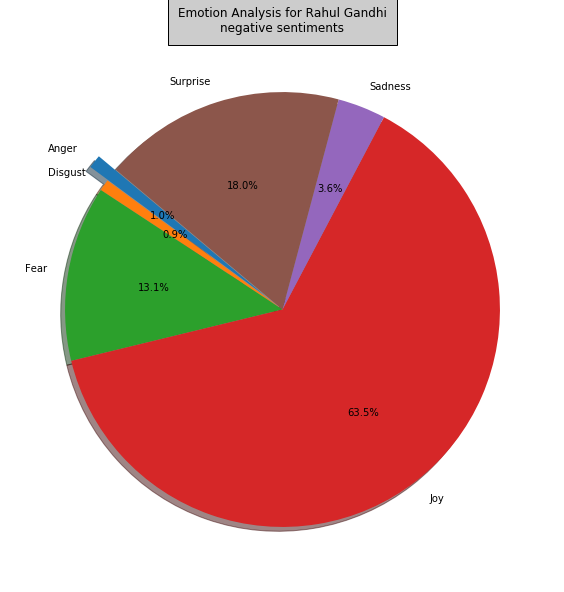

In [18]:
plt.figure(figsize=(10,10))
plt.pie(neg,labels=['Anger','Disgust','Fear','Joy','Sadness','Surprise'],autopct='%1.1f%%',
      explode = (0.1, 0, 0, 0, 0,0),
        colors = ["#1f77b4","#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"],shadow=True, startangle=140
       )
plt.title("Emotion Analysis for Rahul Gandhi\n" + "negative sentiments", bbox={'facecolor':'0.8', 'pad':10})
plt.show()

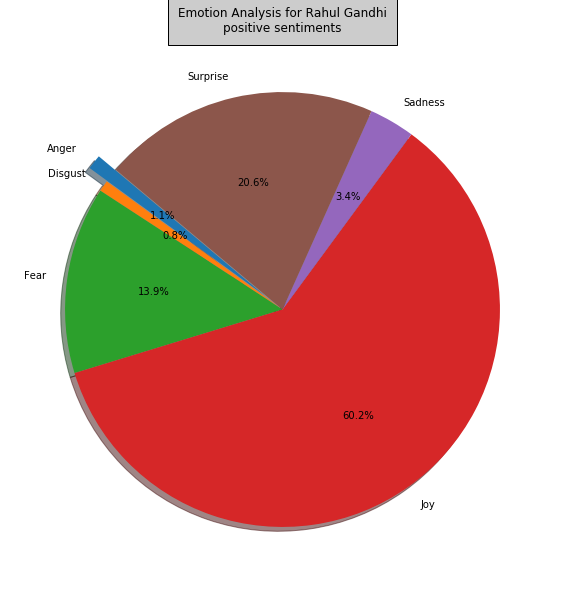

In [19]:
plt.figure(figsize=(10,10))
plt.pie(pos,labels=['Anger','Disgust','Fear','Joy','Sadness','Surprise'],autopct='%1.1f%%',
      explode = (0.1, 0, 0, 0, 0,0),
        colors = ["#1f77b4" ,"#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"],shadow=True, startangle=140
       )
plt.title("Emotion Analysis for Rahul Gandhi\n" + "positive sentiments", bbox={'facecolor':'0.8', 'pad':10})
plt.show()


# Data analysis

### preprocessing (cleaning tweets)

In [20]:
rahul_df.tail(10)

Content    pos    neg    neu  \
4794  @PawanDurani @RahulGandhi @ArvindKejriwal Holl...  0.302  0.000  0.698   
4795  @ArvindKejriwal If you support @narendramodi I...  0.081  0.000  0.919   
4796  @RahulGandhi Give  me exact  translation mr Ra...  0.000  0.000  1.000   
4797  SC issues notice to Rahul Gandhi over remarks ...  0.060  0.000  0.940   
4798  Supreme Court Seeks an Explaination from Rahul...  0.161  0.000  0.839   
4799  @AjayKushwaha_ @RahulGandhi All PSU &amp; Gove...  0.000  0.000  1.000   
4800  @geetv79 @RahulGandhi Very true. \n\nLet sense...  0.340  0.000  0.660   
4801  Rahul Gandhi is going to lose his Amethi seat ...  0.000  0.215  0.785   
4802  Rahul Gandhi spoke highly about Dr.           ...  0.137  0.085  0.778   
4803  @SushmaSwaraj @rprasad @rajnathsingh @PMOIndia...  0.070  0.151  0.780   

      compound  Emotion  Emotion_fc  sentiment  
4794    0.3818      Joy           0          1  
4795    0.2144      Joy           0          1  
4796    0.0000     Fear           2          0  
4797    0.1027  Sadness           4          1  
4798    0.6369      Joy           0          1  
4799    0.0000      Joy           0          1  
4800    0.4754  Sadness           4          1  
4801   -0.6369      Joy           0          1  
4802    0.2960      Joy           0          0  
4803   -0.5945      Joy           0          1

In [21]:
list_tweets=[i for i in rahul_df.Content.values]
cleaned_content=[]


In [22]:
for tweet in list_tweets:
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', " ",str(tweet))
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', " ",str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub(r"that's", "that is",str(tweet))
    
    
    tweet = re.sub(r'\W'," ",str(tweet))
    tweet = re.sub(r'\d', " ",str(tweet))
    tweet = re.sub(r'\s+[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+[a-z]$'," ",str(tweet))
    tweet = re.sub(r'^[a-z]\s+'," ",str(tweet))
    tweet = re.sub(r'\s+'," ",str(tweet))
    
    cleaned_content.append(tweet)
    
rahul_df['cleaned_content'] = cleaned_content

In [23]:
rahul_df.to_csv("RahulCombine.csv")

### Bag of words model

In [24]:
from nltk.corpus import stopwords
from sklearn.datasets import load_files
import nltk
nltk.download('stopwords')

#Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=len(sentim), min_df=3, max_df=0.6,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(cleaned_content).toarray()


#Term Frequency - Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()


#Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=len(X), min_df=3, max_df=0.6,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(cleaned_content).toarray()

y = np.array(sentim).ravel()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/goodwillhunting/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#Training and test set
from sklearn.model_selection import train_test_split
text_train,text_test,sent_train,sent_test= train_test_split(X,y,test_size=0.2,random_state = 42)

### Build a classifier

In [26]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(text_train,sent_train)

/home/goodwillhunting/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB(alpha=1.0, fit_prior=True)
nb_clf.fit(text_train,sent_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier(random_state=42,n_jobs=-1)
rand_clf.fit(text_train,sent_train)


/home/goodwillhunting/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import accuracy_score,classification_report
for clf in (lg_clf, nb_clf, rand_clf):
#     sent_test_pred = clf.predict(text_test)
    print(clf.__class__.__name__, clf.score(text_train,sent_train))
print('---------'*8)
for clf in (lg_clf, nb_clf, rand_clf):
    sent_test_pred = clf.predict(text_test)

    print(clf.__class__.__name__, accuracy_score(sent_test,sent_test_pred))
    

LogisticRegression 0.8550611501431173
MultinomialNB 0.8001561280249805
RandomForestClassifier 0.990632318501171
------------------------------------------------------------------------
LogisticRegression 0.7731529656607701
MultinomialNB 0.7221644120707597
RandomForestClassifier 0.7617065556711758


In [40]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
estimators=[('lr', lg_clf), ('svc', rand_clf)],
voting='soft'
)
voting_clf.fit(text_train,sent_train)

/home/goodwillhunting/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('svc', RandomF...timators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [41]:
voting_clf.score(text_test,sent_test)

0.7793964620187305

In [32]:
sent_test_pred = clf.predict(text_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(sent_test,sent_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.64      0.53      0.58       295
    Positive       0.80      0.87      0.83       666

   micro avg       0.76      0.76      0.76       961
   macro avg       0.72      0.70      0.70       961
weighted avg       0.75      0.76      0.75       961

